# World Happiness Model

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. 

Label  = Happiness Score   
Features = Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data

data=pd.read_csv("happiness.csv")

In [3]:
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


We can read all the data and the entire dataset consits of 158 rows and 12 columns

In [5]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Here we can see all the feature names and label. The Happiness score is taken as label as it gives the output score/result

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
data.info

<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  

we can see information on all the columns. Required data is of int and float type. obj type data seems to be not relavant to output. so we will drop later.

There are entirely 158 rows and 12 columns present overall

# Statistical Summary

In [8]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
data['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [10]:
pd.set_option("display.max_rows",None)
data['Happiness Score'].value_counts()      

5.192    2
4.642    1
5.098    1
5.129    1
5.889    1
6.937    1
4.694    1
3.681    1
4.350    1
6.611    1
3.006    1
4.949    1
3.575    1
5.975    1
5.960    1
6.574    1
4.677    1
4.874    1
7.561    1
4.077    1
4.839    1
6.983    1
4.681    1
5.194    1
6.168    1
6.505    1
4.419    1
5.759    1
5.332    1
6.003    1
5.754    1
6.798    1
5.689    1
6.298    1
6.411    1
3.655    1
5.548    1
5.212    1
4.715    1
6.329    1
3.340    1
3.781    1
5.848    1
4.512    1
4.297    1
5.878    1
3.995    1
4.885    1
3.667    1
5.360    1
5.102    1
3.587    1
4.686    1
5.995    1
6.853    1
7.522    1
6.786    1
4.786    1
7.527    1
6.485    1
3.678    1
4.565    1
6.269    1
6.810    1
4.194    1
6.946    1
5.429    1
7.226    1
5.399    1
6.123    1
5.890    1
4.876    1
5.007    1
5.855    1
3.956    1
5.770    1
5.605    1
4.518    1
4.788    1
6.940    1
5.987    1
5.824    1
5.716    1
5.833    1
4.739    1
3.465    1
2.905    1
4.971    1
6.295    1
4.959    1
6.302    1

This shows that the data is continuous as it has different output datas. We can go with Lineaer Regression technique in this model

# Data Visualization

In [11]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

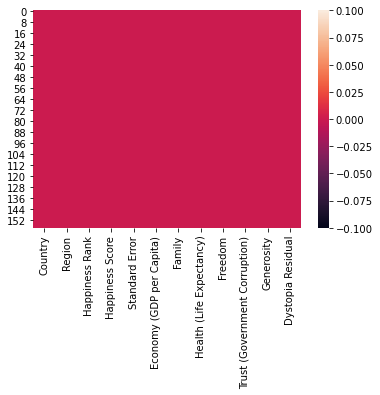

In [12]:
#missing values
sns.heatmap(data.isnull())

There are No missing values/null values present in the dataset

# Checking Correlation

In [13]:
dcorr=data.corr()

In [14]:
dcorr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


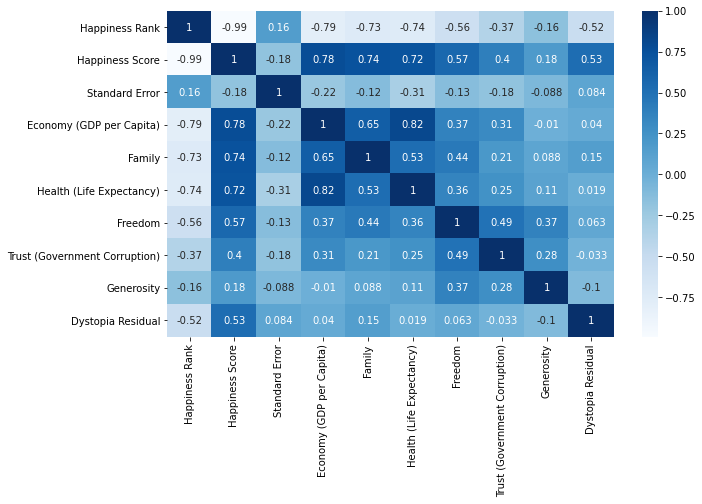

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(dcorr,cmap='Blues',annot=True)

Happiness rank and standard Score are high negatively correlated. Happiness rank is highly negative correlated ~-1 and standard score is also close to zero which can be removed if needed.

# Plotting Outliers

In [16]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

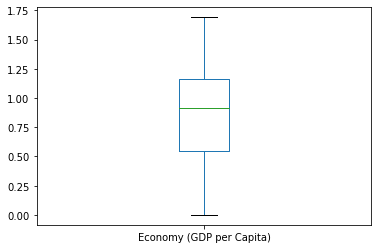

In [17]:
#univariate analysis
columns=['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

data['Economy (GDP per Capita)'].plot.box()

There are no Outliers in Economy

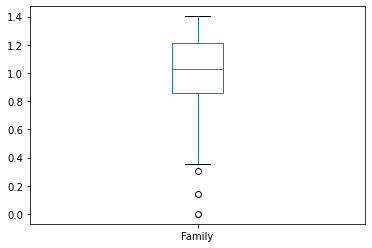

In [18]:
data['Family'].plot.box()

There is Outliers in Family

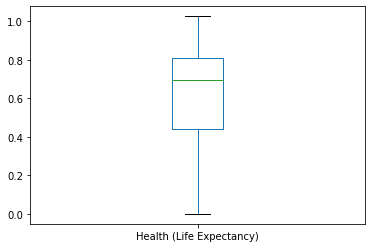

In [19]:
data['Health (Life Expectancy)'].plot.box()

There are no Outliers in Health

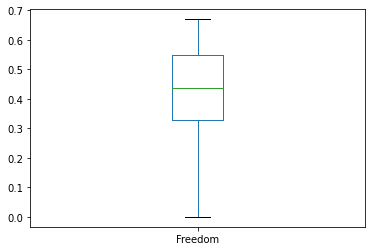

In [20]:
data['Freedom'].plot.box()

There are no Outliers in Freedom

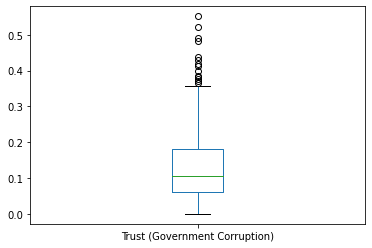

In [21]:
data['Trust (Government Corruption)'].plot.box()

There are Outliers in Trust which need to  looked upon

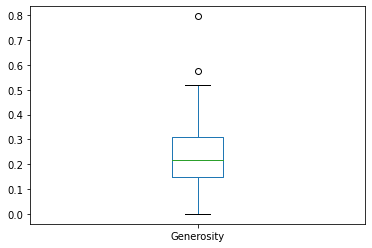

In [22]:
data['Generosity'].plot.box()

There are Outliers in Generosity

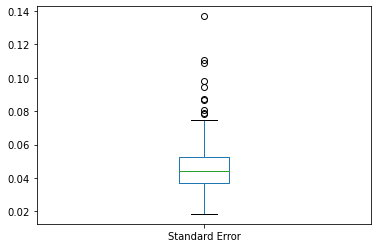

In [23]:
data['Standard Error'].plot.box()

There are Outliers in Standard Error

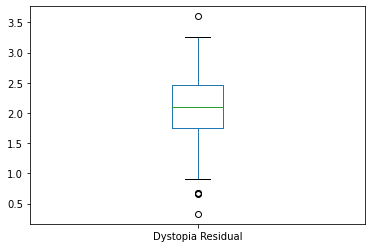

In [24]:
data['Dystopia Residual'].plot.box()

There are no Outliers in Dystopia Residual

In [25]:
data.shape

(158, 12)

Plotting all the datas in a single way of presentation where we can see all the percentiles,whiskers and outliers

In [26]:
collist=data.columns.values
ncol=12
nrows=10

In [27]:
collist

array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype=object)

In [28]:
len(collist)

12

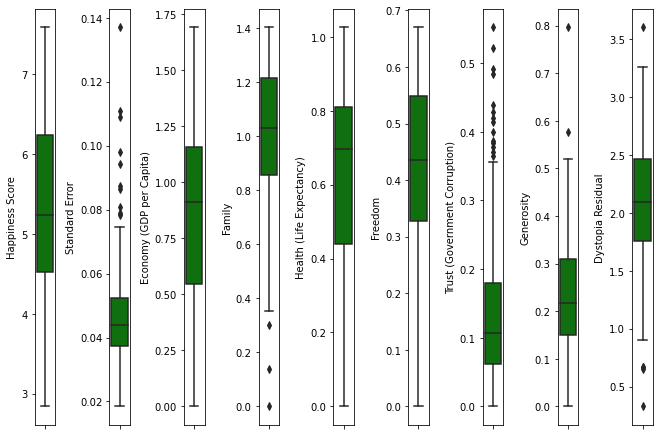

In [29]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(3,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

As Discussed There are outliers in all the specified(as said above)columns. We can remove outliers afer checking skewness too

# To check distribution of skewness

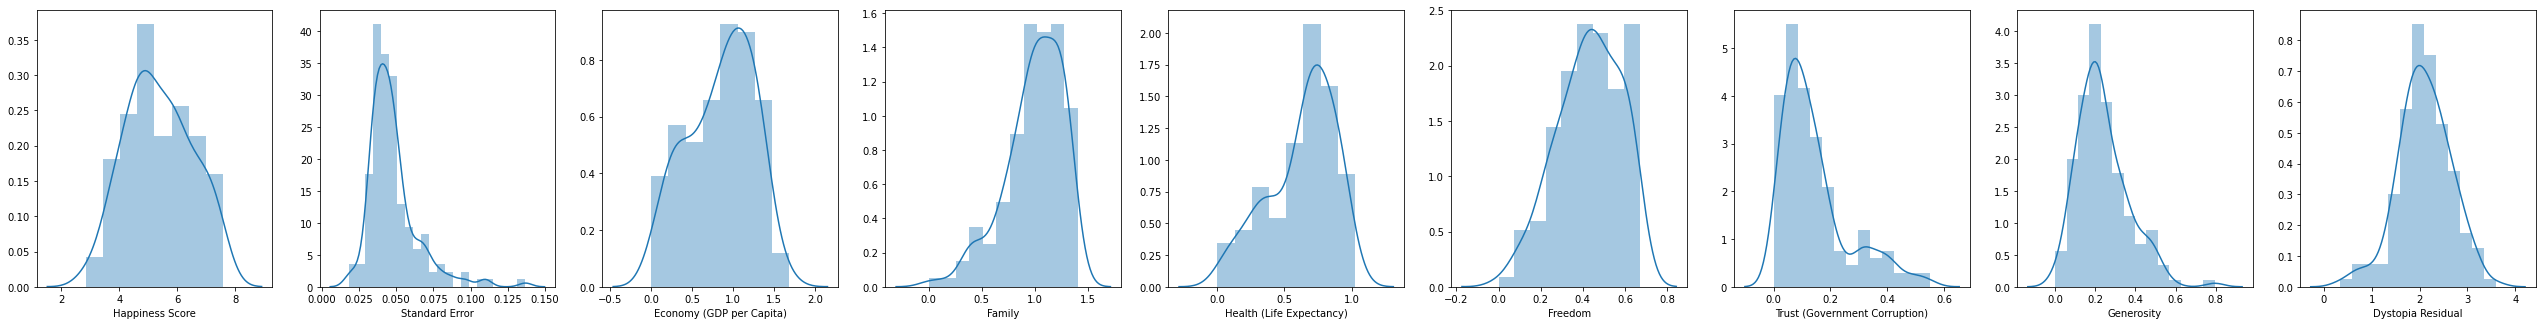

In [30]:
plt.figure(figsize=(60,60))
for i in range(3,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(data[collist[i]])

There is a slight skewness in some of the of the column which can be removed using skewness removal technique

Text(0, 0.5, 'Happiness Score')

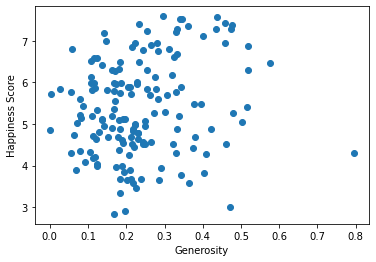

In [31]:
#bivariate analysis
plt.scatter(data['Generosity'],data['Happiness Score'])
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

It shows positive linear relationship between Generosity and happiness score. As Generosity increases Happiness score is high mostly

Text(0, 0.5, 'Happiness Rank')

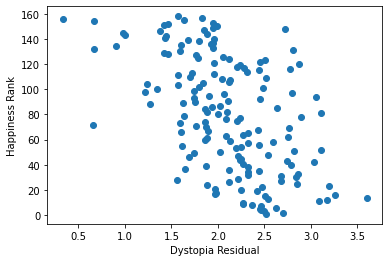

In [32]:
plt.scatter(data['Dystopia Residual'],data['Happiness Rank'])
plt.xlabel('Dystopia Residual')
plt.ylabel('Happiness Rank')

It shows negative linear relationship between Happiness rank and  Dystopia Residual. As Dystopia Residual increases,Happiness rank reduces

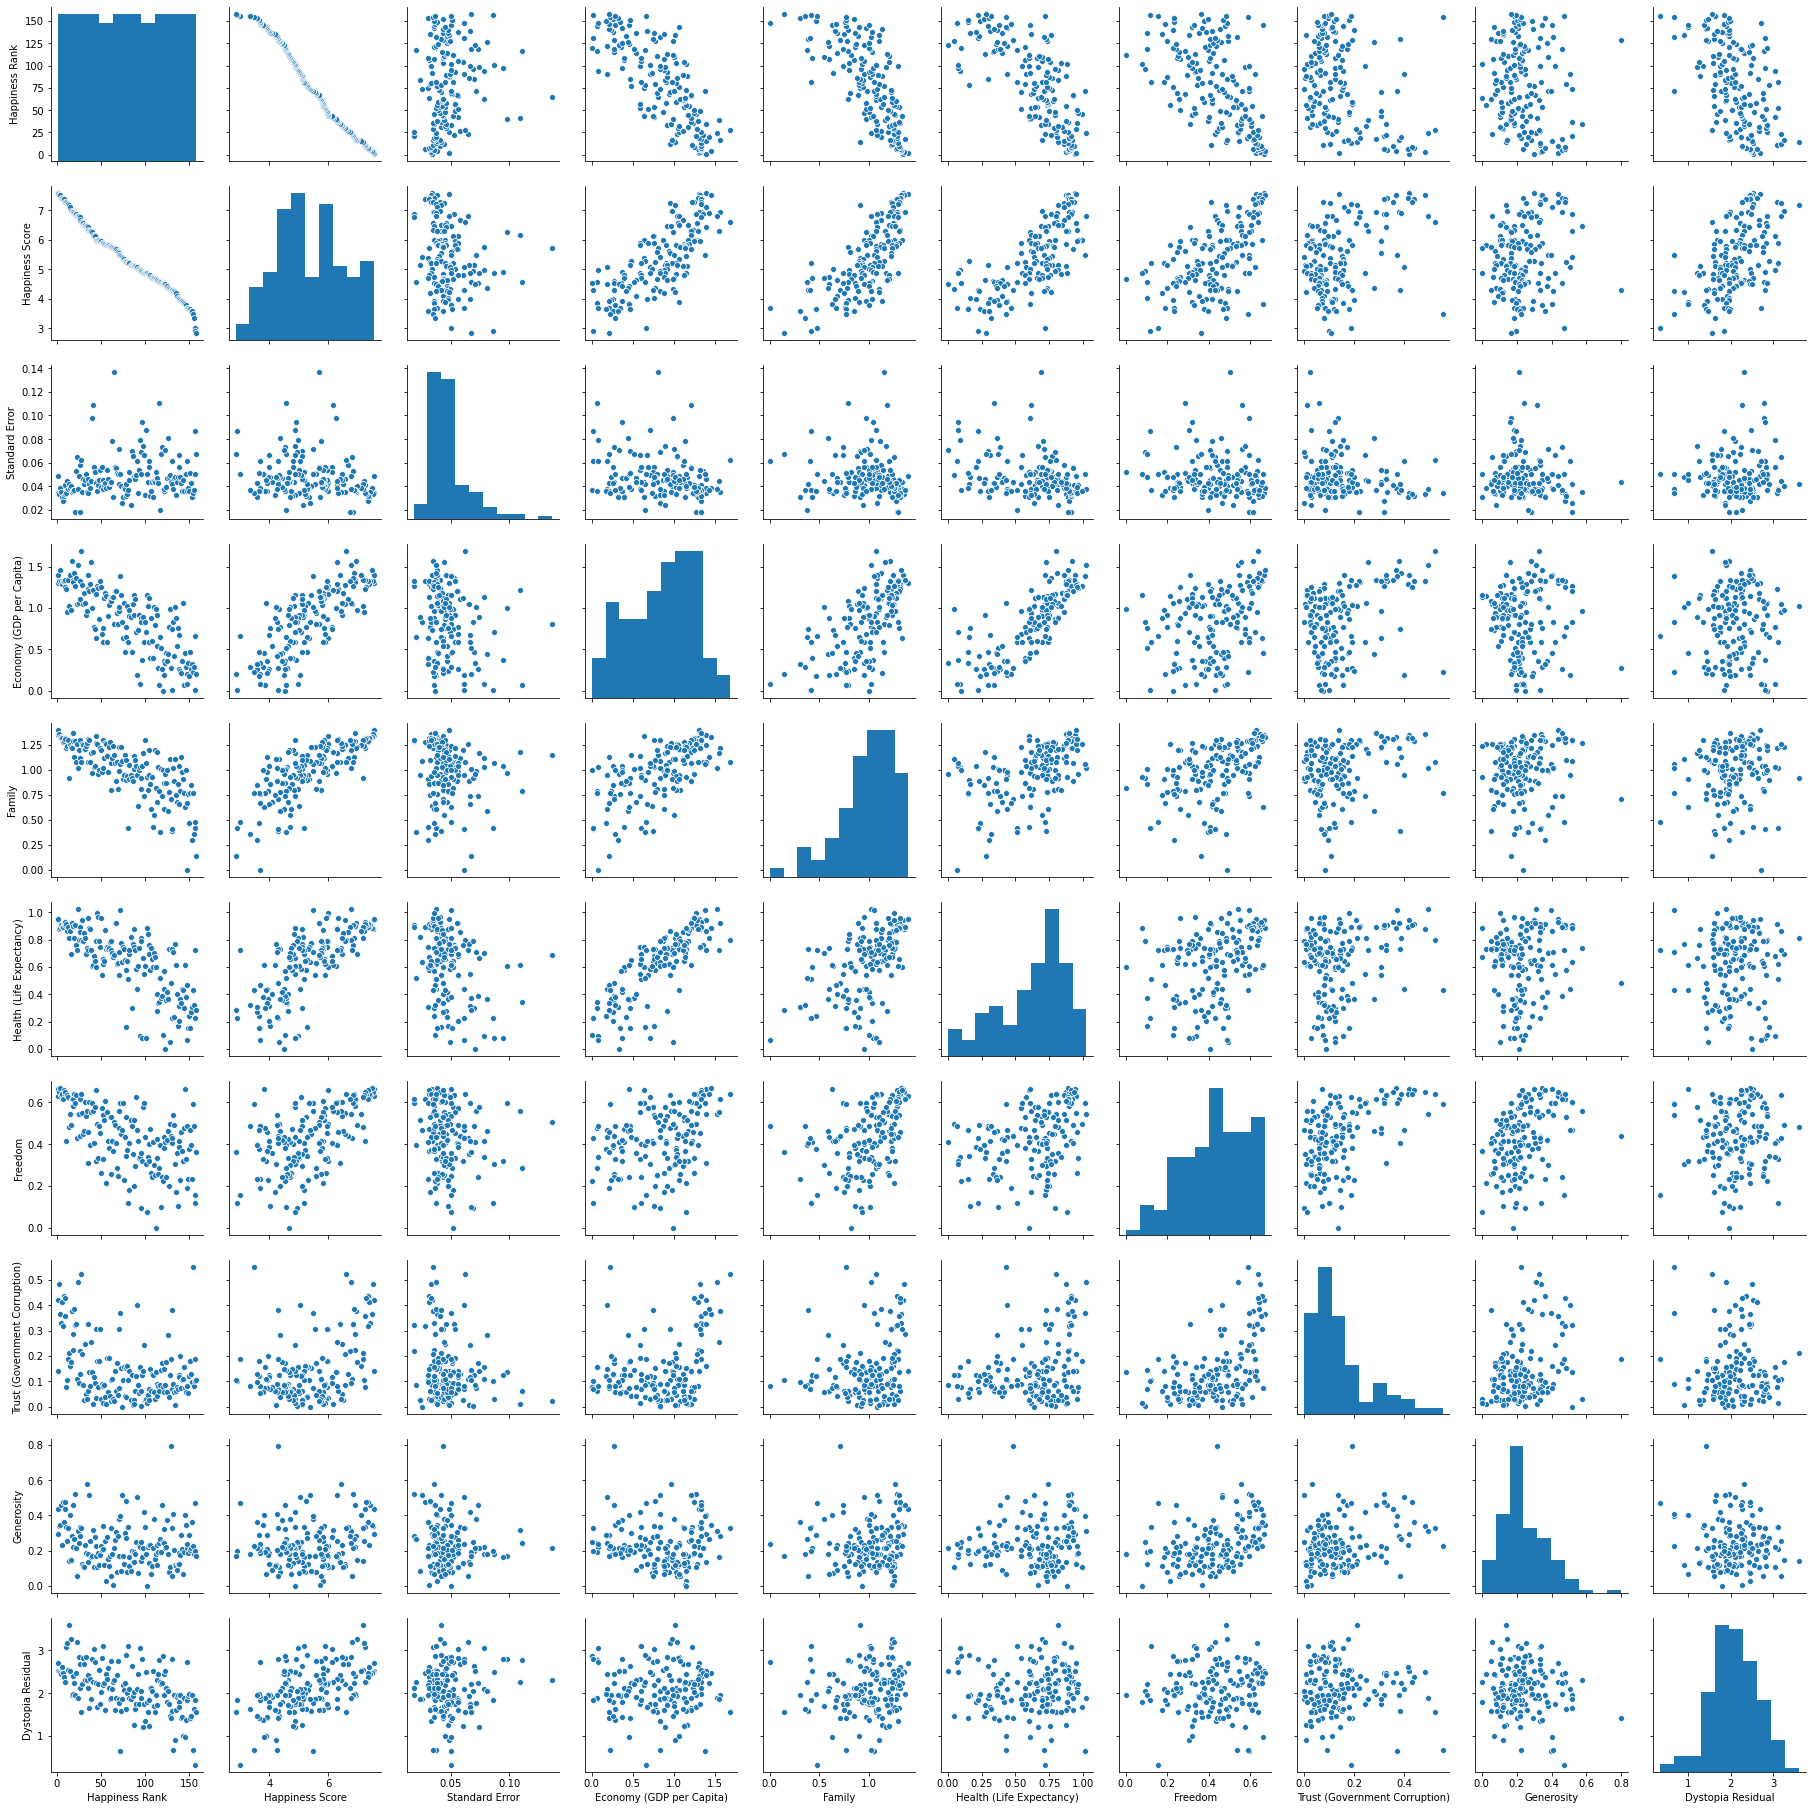

In [33]:
sns.pairplot(data)

All the columns have positive linear relationship with respect to happiness score except Happiness Rank.

In [34]:
#Dropping negatively correlated columns from dataset
data.drop('Happiness Rank',axis=1,inplace=True)
data.drop('Standard Error',axis=1,inplace=True)

In [35]:
data

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [36]:
#Dropping object file as it doesn't give any impact to happiness score
data.drop('Country',axis=1,inplace=True)
data.drop('Region',axis=1,inplace=True)

In [37]:
data.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Removing Outliers

In [38]:
#zscore calculation

from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.93736005, 1.36962124, 1.32028142, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 1.13522625, 1.51445776, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 1.19286069, 1.36105403, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.45524543, 1.90108634, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.06756644, 2.1184666 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.58633379, 3.13472485, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [39]:
#printing Zscore greater than 3 which is considered to be outliers

threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([5, 6, 2, 5, 7, 2], dtype=int64))


In [40]:
z[27][5]

3.1646194851713774

In [41]:
z[128][6]

4.423261580434631

In [42]:
#removing outliers

data_new=data[(z<3).all(axis=1)]

In [43]:
df=data_new

In [44]:
#output without outliers
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [45]:
df.shape

(152, 8)

The outliers are removed and we have 152 rows and 8 columns now

# Removing skewness

In [46]:
#Assigning values for x and y. Removing skewness

x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [47]:
x.skew()

Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)    1.287270
Generosity                       0.646579
Dystopia Residual               -0.045578
dtype: float64

There is one data 'Trust' which has no acceptable range of skewness for which we need to remove skewness. All other data is in acceptable and partially acceptable range.

In [48]:
x['Trust (Government Corruption)']=np.sqrt(x['Trust (Government Corruption)'])

In [49]:
x.skew()

Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)    0.447061
Generosity                       0.646579
Dystopia Residual               -0.045578
dtype: float64

Skewness is removed. The data which has partial skewness is treated with skewness removal technique leading to increase in skewness. Therefore partial skewness range is ignored.

No skweness. All the datas are normally distributed. Minimum changes found due to slight variation in skewness but major skewness removed using all the method.   


EDA done

# Model Building

In [50]:
x.shape

(152, 7)

There are 152 rows and 7 columns in x 

In [51]:
y.shape

(152,)

There are 152 rows with a single column in x

In [52]:
#Traing and Testing model

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [53]:
#shapes of x and y (train,test)
x_train.shape

(101, 7)

In [54]:
x_test.shape

(51, 7)

In [55]:
y_train.shape

(101,)

In [56]:
y_test.shape

(51,)

In [57]:
#importing Algorithm and implementing

from sklearn.linear_model import LinearRegression

In [58]:
#Training Phase

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
#coefficient values

lr.coef_

array([1.02786156, 1.01240266, 1.0055559 , 0.9637713 , 0.71710542,
       1.07817875, 1.00103903])

In [60]:
#intercept values

lr.intercept_

-0.14999827515325936

In [61]:
#score of trained data

lr.score(x_train,y_train)

0.9994107110039052

99.94% the model is working for trained data

In [62]:
#prediction phase

pred=lr.predict(x_test)
pred1=pred.reshape(1,-1)
print("Predicted result ",pred1)

Predicted result  [[5.53088397 3.6530953  4.90331523 5.11294057 3.99707111 3.91055387
  6.71067982 7.23717645 6.95854042 7.0010519  4.04368113 4.28216881
  4.70994203 6.86896065 5.50379461 7.27716701 5.71611016 6.49276533
  4.34400638 4.57294939 4.61295997 6.48066197 5.83032487 5.59925174
  5.73818308 3.93097775 6.33333295 5.06010958 4.62053884 5.97662588
  5.11510042 6.49218646 6.82911527 5.90236614 5.28275689 7.25026336
  4.22820491 4.56340296 5.83925937 6.59297567 3.58895174 4.33846371
  7.43286716 6.47488089 6.01287089 3.91235723 4.71259991 6.92459625
  7.31856614 4.4465597  4.90405311]]


In [63]:
#interpreting predicted value with actual value

print("Actual result ",y_test)

Actual result  69     5.548
150    3.655
97     4.885
83     5.140
137    3.995
141    3.904
26     6.670
12     7.200
18     6.937
15     6.983
136    4.033
130    4.292
109    4.686
19     6.901
70     5.477
9      7.284
66     5.689
31     6.485
127    4.332
116    4.565
114    4.610
32     6.477
57     5.824
68     5.589
61     5.759
140    3.931
37     6.298
87     5.102
113    4.633
43     6.003
86     5.123
30     6.505
22     6.810
52     5.878
76     5.286
11     7.226
129    4.297
115    4.571
56     5.828
28     6.575
151    3.587
126    4.350
4      7.427
33     6.455
46     5.984
142    3.896
111    4.677
16     6.946
10     7.278
123    4.436
96     4.898
Name: Happiness Score, dtype: float64


The values seems to be almost same. After checking the r2 score and cross validation we will confirm the algorithm

In [64]:
lr.score(x_test,y_test)

0.9996112249541765

test score is also 99.96% which is almost same. Therefore no overfitting found.

In [65]:
#Error present

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [66]:
print("Error")
print("mean absolute error : ",mean_absolute_error(y_test,pred))
print("mean squared error : ",mean_squared_error(y_test,pred))

Error
mean absolute error :  0.017872408782768634
mean squared error :  0.0004996650561903469


Error is very low

In [67]:
#r2 score of the model

print(r2_score(y_test,pred))

0.9996112249541765


The model shows very good r2_score of 99.96% which we will check with cross validation. if difference is low we can implement the model.

In [68]:
#Cross validation for the Linear regression model

from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
score=cross_val_score(lr,x,y,scoring='r2',cv=5)
print(lr,"Cross val score is ",score)
print("mean is ",score.mean())

LinearRegression() Cross val score is  [0.97988143 0.98879255 0.97755246 0.98089578 0.99725979]
mean is  0.9848764013322937


we get cross validation score of 98.48%

The Algorithm is working excellent. It can predict most of the data accurately.So, we are looking not implementing other algorithm. Saving the file as object file.

In [69]:
#dumping the model into output object file

joblib.dump(lr,"linr_HappinessScore_prediction.obj")

['linr_HappinessScore_prediction.obj']

In [70]:
#Lets Checking loading the file 

In [71]:
Happiness_prediction=joblib.load("linr_HappinessScore_prediction.obj")

In [72]:
list([Happiness_prediction.predict(x_train)])

[array([5.26375391, 4.17209713, 5.62101064, 4.65814679, 4.66992597,
        6.81324082, 7.54437915, 5.22719471, 4.96601133, 6.59290823,
        6.1431572 , 6.00991763, 5.7299474 , 4.88773823, 6.77695361,
        6.7261096 , 4.86883775, 6.14173265, 3.78418682, 3.6823594 ,
        5.95537065, 4.84650443, 4.54165382, 5.36467582, 6.40313997,
        3.32551436, 4.73968342, 5.70007799, 5.2210629 , 5.06983347,
        5.85251189, 7.35858943, 4.8785908 , 4.79191187, 5.89681108,
        6.35595168, 5.20843573, 5.28854182, 6.35204364, 4.51595571,
        7.31515299, 6.00032132, 5.45689943, 3.65676125, 4.33952882,
        5.13392616, 3.99236729, 3.9524156 , 5.00531524, 7.2492431 ,
        7.19682427, 4.42498516, 4.07132754, 7.50795121, 6.96218037,
        6.28547426, 5.31417518, 4.20280367, 7.38984012, 3.83526691,
        4.82594298, 7.45659779, 5.68604965, 5.7935923 , 4.69673879,
        5.85427176, 4.51696275, 5.98429375, 4.51110306, 5.78293455,
        3.58736254, 5.22074435, 5.8050544 , 5.01

In [73]:
y_train

77     5.268
133    4.218
67     5.605
112    4.642
110    4.681
24     6.786
0      7.587
79     5.212
94     4.959
29     6.574
41     6.130
45     5.987
65     5.695
95     4.949
25     6.750
23     6.798
99     4.874
40     6.168
145    3.781
146    3.681
48     5.960
102    4.839
118    4.518
74     5.360
34     6.411
154    3.340
106    4.739
63     5.716
82     5.192
85     5.124
54     5.848
5      7.406
98     4.876
105    4.786
50     5.890
36     6.302
81     5.192
78     5.253
35     6.329
119    4.517
7      7.364
44     5.995
71     5.474
148    3.667
125    4.369
84     5.129
138    3.989
139    3.956
90     5.057
8      7.286
13     7.187
124    4.419
135    4.077
3      7.522
17     6.940
39     6.269
73     5.399
134    4.194
6      7.378
143    3.845
101    4.857
2      7.527
64     5.709
55     5.833
108    4.694
51     5.889
120    4.514
47     5.975
121    4.512
62     5.754
152    3.575
80     5.194
60     5.770
92     5.007
42     6.123
59     5.791
91     5.013

The datas predicted are almost matching. The jobfile created is working well almost giving very good accuracy.

# Model Created Succesfully